# STRPy Advanced Usage

Multiple seasonalities and parameter tuning.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from strpy import STR_decompose, AutoSTR_simple, moving_average_decompose

np.random.seed(42)

## Multiple Seasonalities

In [2]:
# Create data with weekly + monthly patterns
n = 365
t = np.arange(n)
trend = 0.01 * t
weekly = np.sin(2*np.pi*t/7)
monthly = 0.5 * np.sin(2*np.pi*t/30)
noise = 0.2 * np.random.randn(n)
data = trend + weekly + monthly + noise

# Decompose
result = STR_decompose(data, seasonal_periods=[7, 30], 
                       trend_lambda=1000, seasonal_lambda=50)

print(f"Number of seasonal components: {len(result.seasonal)}")
print(f"R²: {1 - result.remainder.var()/data.var():.3f}")

Number of seasonal components: 2
R²: 0.624


In [ ]:
# Plot components
fig, axes = plt.subplots(4, 1, figsize=(12, 8))

axes[0].plot(result.trend, 'r-')
axes[0].set_title('Trend')
axes[0].grid(True, alpha=0.3)

axes[1].plot(result.seasonal[0][:56], 'g-')  # 8 weeks
axes[1].set_title('Weekly Seasonal')
axes[1].grid(True, alpha=0.3)

axes[2].plot(result.seasonal[1][:90], 'b-')  # 3 months
axes[2].set_title('Monthly Seasonal')
axes[2].grid(True, alpha=0.3)

axes[3].plot(result.remainder, 'gray', alpha=0.7)
axes[3].set_title('Remainder')
axes[3].set_xlabel('Time')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Manual vs Auto Parameters

In [3]:
# Manual
r1 = STR_decompose(data, seasonal_periods=[7], 
                   trend_lambda=500, seasonal_lambda=50)

# Auto
r2 = AutoSTR_simple(data, seasonal_periods=[7], n_trials=15)

print("Manual parameters:")
print(f"  R²: {1 - r1.remainder.var()/data.var():.3f}")
print(f"\nAuto parameters:")
print(f"  trend_λ={r2.params['trend_lambda']:.1f}, seasonal_λ={r2.params['seasonal_lambda']:.1f}")
print(f"  R²: {1 - r2.remainder.var()/data.var():.3f}")

Searching for optimal parameters (15 trials)...
  Trial 1: trend_λ=46.9, seasonal_λ=775.7, score=511.12 ✓
  Trial 2: trend_λ=10.9, seasonal_λ=812.2, score=478.22 ✓
  Trial 4: trend_λ=382.9, seasonal_λ=952.6, score=369.65 ✓
  Trial 6: trend_λ=8089.2, seasonal_λ=37.1, score=-75.12 ✓

Optimal parameters found:
  trend_lambda: 8089.2
  seasonal_lambda: 37.1
Manual parameters:
  R²: 0.625

Auto parameters:
  trend_λ=8089.2, seasonal_λ=37.1
  R²: 0.623


## Baseline Comparison

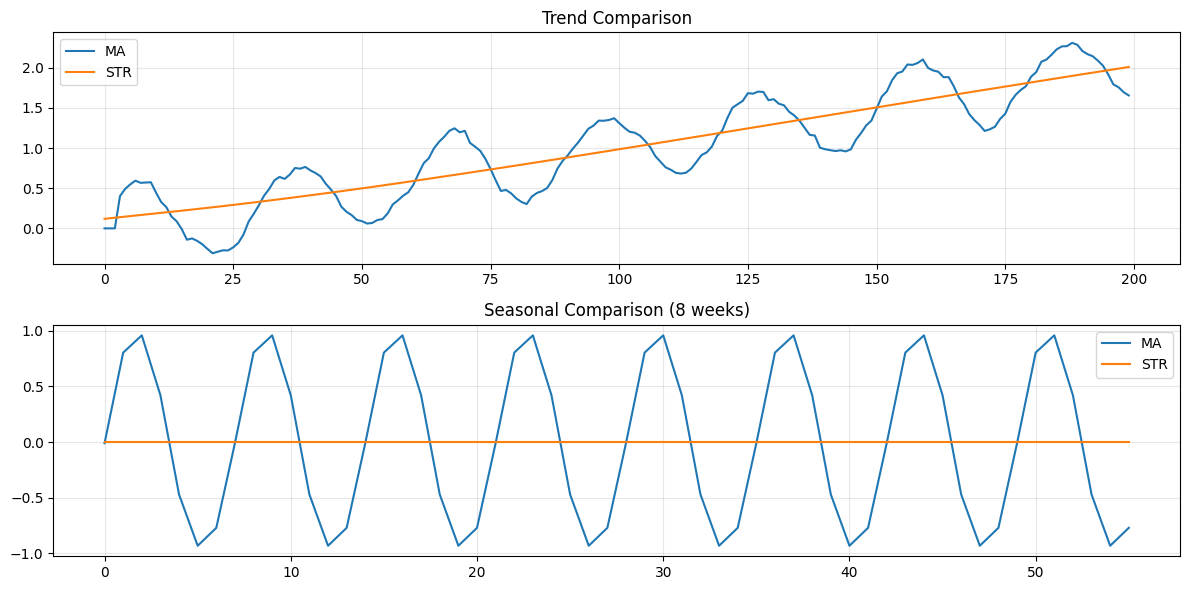

MA remainder std: 0.401
STR remainder std: 0.807


In [4]:
# Simple moving average
baseline = moving_average_decompose(data, period=7)

# STR
str_result = STR_decompose(data, seasonal_periods=[7], 
                           trend_lambda=1000, seasonal_lambda=100)

# Compare
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

axes[0].plot(baseline['trend'][:200], label='MA')
axes[0].plot(str_result.trend[:200], label='STR')
axes[0].set_title('Trend Comparison')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(baseline['seasonal'][:56], label='MA')
axes[1].plot(str_result.seasonal[0][:56], label='STR')
axes[1].set_title('Seasonal Comparison (8 weeks)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"MA remainder std: {baseline['remainder'].std():.3f}")
print(f"STR remainder std: {str_result.remainder.std():.3f}")

## Parameter Sensitivity

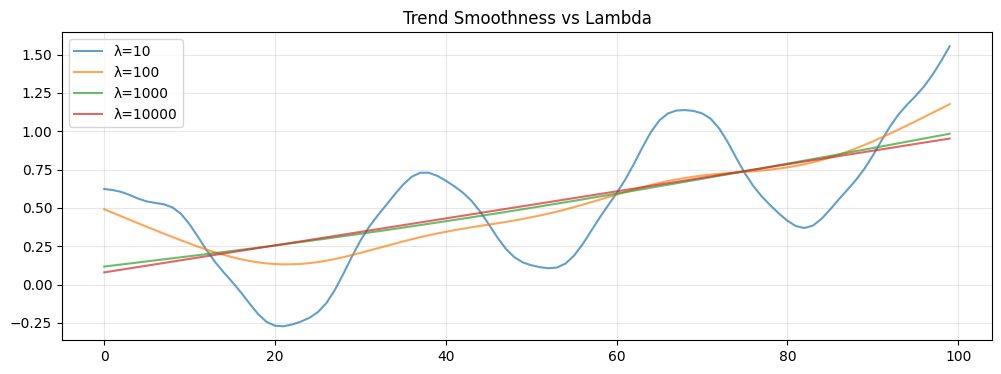

Higher λ → smoother trend


In [5]:
# Test different lambda values
lambdas = [10, 100, 1000, 10000]
results = []

for lam in lambdas:
    r = STR_decompose(data[:100], seasonal_periods=[7], 
                      trend_lambda=lam, seasonal_lambda=100)
    results.append(r)

# Plot trends
fig, ax = plt.subplots(figsize=(12, 4))
for i, (lam, r) in enumerate(zip(lambdas, results)):
    ax.plot(r.trend, label=f'λ={lam}', alpha=0.7)
ax.set_title('Trend Smoothness vs Lambda')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

print("Higher λ → smoother trend")